In [1]:
# Datasource: The data for this example is taken from the article below:
# URL: https://www.datascience.com/blog/k-means-clustering

In [2]:
###: Importing h2o and other required libraries

In [3]:
import h2o
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
###: Initializing H2O Cluster

In [5]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,12 hours 17 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,30 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_ppg732
H2O cluster total nodes:,1
H2O cluster free memory:,2.927 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [6]:
###: Importing dataset

In [7]:
hdf = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/driver_delivery_speed.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
###: Understanding Dataset

In [9]:
hdf.describe()

Rows:4000
Cols:3




,Driver_ID,Distance_Feature,Speeding_Feature
type,int,real,int
mins,3423310448.0,15.52,0.0
mean,3423312447.5,76.0415225,10.721
maxs,3423314447.0,244.79,100.0
sigma,1154.84486693,53.4695625748,13.7085425934
zeros,0,0,23
missing,0,0,0
0,3423311935.0,71.24,28.0
1,3423313212.0,52.53,25.0
2,3423313724.0,64.54,27.0


In [10]:
###: This dataset has 3 columns
# Driver ID
# Distance_Feature: mean distance driven per day
# Speeding_Feature: mean percentage of time a driver was >5 mph over the speed limit.

In [11]:
hdf.head(5)

Driver_ID,Distance_Feature,Speeding_Feature
3.42331e+09,71.24,28
3.42331e+09,52.53,25
3.42331e+09,64.54,27
3.42331e+09,55.69,22
3.42331e+09,54.58,25


In [12]:
###: Only selecting Distance_Feature and Speeding_Feature from the dataset

In [13]:
hdf = hdf[:,['Distance_Feature', 'Speeding_Feature']]

In [14]:
hdf

Distance_Feature,Speeding_Feature
71.24,28
52.53,25
64.54,27
55.69,22
54.58,25
41.91,10
58.64,20
52.02,8
31.25,34
44.31,19


In [15]:
###: Visualizing dataset to understand the distribution better

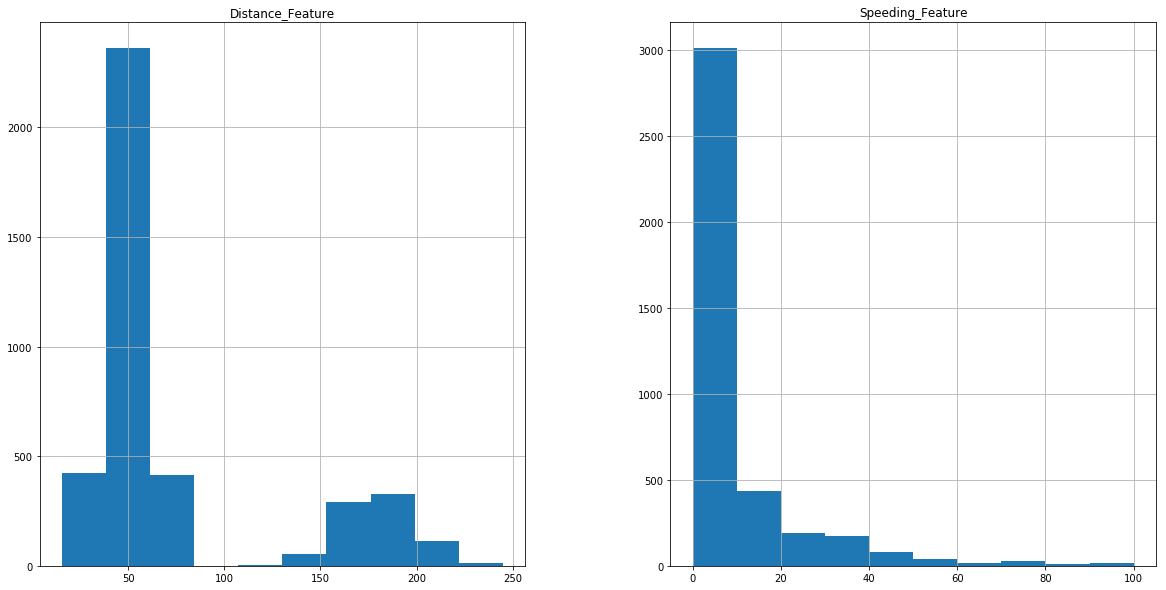

In [16]:
import pylab as pl
hdf.as_data_frame().hist(figsize=(20,10))
pl.show()

In [17]:
###: Plotting all the points into scatter-plot to understand the distribution

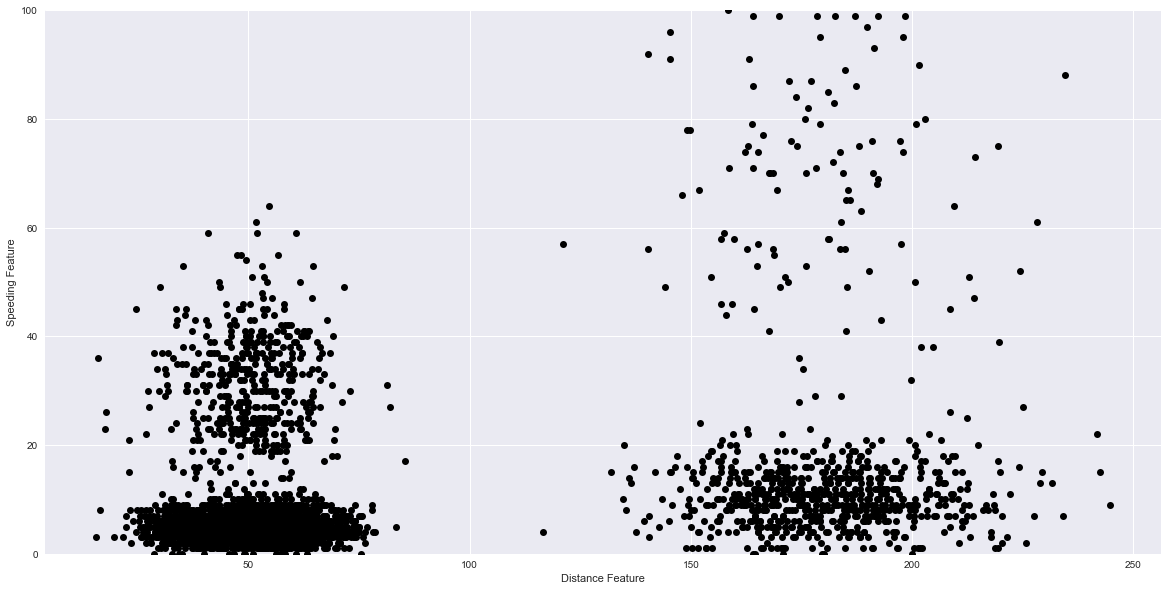

In [50]:
plt.figure(figsize=(20,10))
plt.plot(hdf.as_data_frame().Distance_Feature,hdf.as_data_frame()['Speeding_Feature'],'ko')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.ylim(0,100)
plt.show()

In [19]:
###: Importing K-means specific H2O library

In [20]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [21]:
###: Creating a cluster of size 4 with the given data

In [22]:
estimator = H2OKMeansEstimator(k=4, init="Random", seed=2, standardize=True)
estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [23]:
###: Understanding the k-means model by understanding each row assignment into a specific cluster

In [24]:
print(estimator.predict_leaf_node_assignment)

Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1511116713877_111732


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 758.954668665
Total Sum of Square Error to Grand Mean: 7998.00000093
Between Cluster Sum of Square Error: 7239.04533227
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,2796.0,207.9451205
,2.0,105.0,176.0218438
,3.0,694.0,201.5287963
,4.0,405.0,173.4589081


Scoring History: 


,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
,2017-11-19 22:56:07,0.001 sec,0.0,nan,nan
,2017-11-19 22:56:07,0.002 sec,1.0,4000.0,5982.7421879
,2017-11-19 22:56:07,0.002 sec,2.0,1438.0,4476.2296164
,2017-11-19 22:56:07,0.003 sec,3.0,840.0,4142.1636396
,2017-11-19 22:56:07,0.003 sec,4.0,679.0,3621.3933637
,2017-11-19 22:56:07,0.004 sec,5.0,270.0,2467.3556175
,2017-11-19 22:56:07,0.004 sec,6.0,374.0,1992.7958098
,2017-11-19 22:56:07,0.005 sec,7.0,189.0,1767.0320539
,2017-11-19 22:56:07,0.005 sec,8.0,86.0,1709.2149442
,2017-11-19 22:56:07,0.005 sec,9.0,74.0,1659.4492082


<bound method H2OKMeansEstimator.predict_leaf_node_assignment of >


In [25]:
###: Predicting the cluster assignment for the given data

In [26]:
predicted = estimator.predict(hdf)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [27]:
###: Listing the prediction for the clusters

In [28]:
predicted

predict
3
3
3
3
3
0
0
0
3
0


In [29]:
###: Making sure the cluster items matches with cluster count

In [30]:
predicted['predict'].unique()

C1
0
2
1
3


In [31]:
###: Adding the predictions values as a new column to given dataset and then setting it as enum or categorical

In [32]:
hdf["labels"] = predicted["predict"].asfactor()

In [33]:
###: Verifying the given dataset after the prediction column addition

In [34]:
hdf.head(5)

Distance_Feature,Speeding_Feature,labels
71.24,28,3
52.53,25,3
64.54,27,3
55.69,22,3
54.58,25,3


In [35]:
###: Using Seaborn graphic package to visualize data based on predicted cluster labels

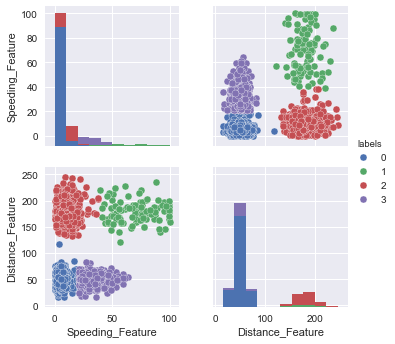

In [36]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(hdf.as_data_frame(), vars=["Speeding_Feature" , "Distance_Feature"], hue="labels");
plt.show()

In [37]:
###: Getting unique values from the prediction results which are basicaly cluster ids

In [38]:
predicted['predict'].asfactor().levels()

[['0', '1', '2', '3']]

In [39]:
###: Converting the Prediction values to a numpy array of int32 type

In [40]:
pred_array = np.array(predicted.as_data_frame()['predict'].values.tolist(), dtype=np.int32)
pred_array

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [41]:
### Extracting each column values from the given dataset as a list

In [42]:
f1 = hdf.as_data_frame()['Distance_Feature'].values
f2 = hdf.as_data_frame()['Speeding_Feature'].values

In [43]:
###: Creating a function to Plot the prediction results using the predction levels on given data

In [44]:
def plot_kmeans_labels(labels):
    plt.figure(figsize=(20,10))
    h1,=plt.plot(f1[labels==0],f2[labels==0],'go')

    plt.plot(np.mean(f1[labels==0]),np.mean(f2[labels==0]),'g*',markersize=20,mew=3)
    h2,=plt.plot(f1[labels==1],f2[labels==1],'bo')
    plt.plot(np.mean(f1[labels==1]),np.mean(f2[labels==1]),'b*',markersize=20,mew=3)
    h3,=plt.plot(f1[labels==2],f2[labels==2],'mo')
    plt.plot(np.mean(f1[labels==2]),np.mean(f2[labels==2]),'m*',markersize=20,mew=3)
    h4,=plt.plot(f1[labels==3],f2[labels==3],'ro')
    plt.plot(np.mean(f1[labels==3]),np.mean(f2[labels==3]),'r*',markersize=20,mew=3)
    plt.ylabel('Speeding Feature')
    plt.xlabel('Distance Feature')
    plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
    plt.show()

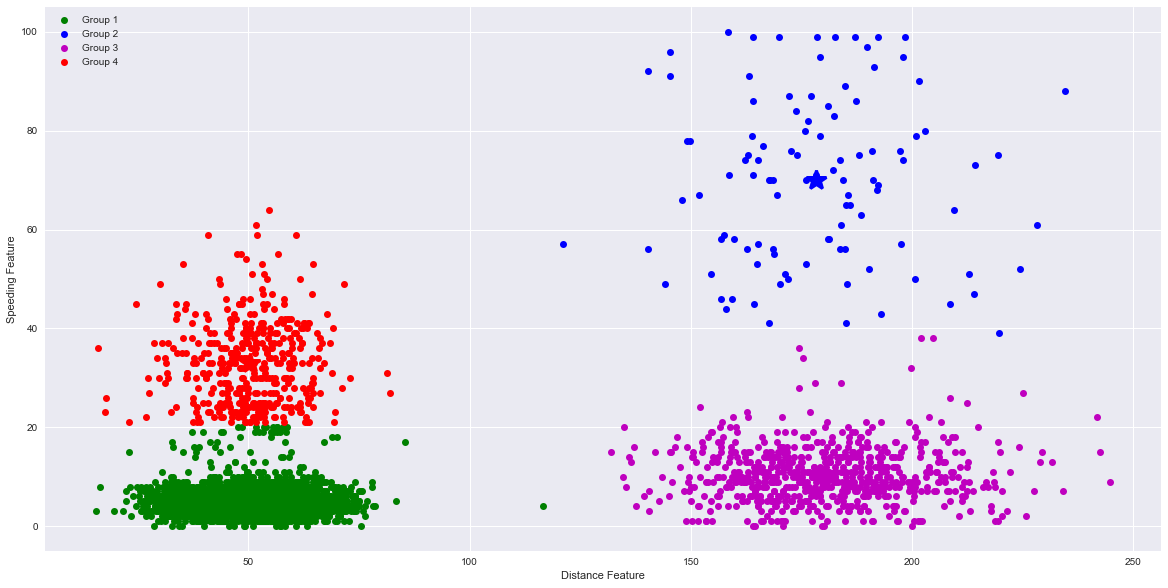

In [45]:
plot_kmeans_labels(pred_array)

In [46]:
###: The following example shows how to use a range of clusters size to generate results

In [47]:
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,15)]
for estimator in results:
    estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress:

In [48]:
###: The following example shows how to use estimate_k to find the cluster size

In [49]:
estimator = H2OKMeansEstimator(k=100, estimate_k = True,  init="Random", seed=2, standardize=True)
estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
